In [1]:
from numpy import *
from scipy.sparse import *
from scipy.sparse.linalg import *
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

In [2]:
M=load_npz("reducedTargetT.npz")
M

<32195x31900 sparse matrix of type '<class 'numpy.int8'>'
	with 156621 stored elements in Compressed Sparse Row format>

In [3]:
P=load_npz("playlist_reduced.npz")
P=normalize(P)

In [4]:
kk=35
u, s, vt = svds(P.astype("float32"), k=kk)

In [5]:
s

array([  5.64763308,   5.73775959,   5.83419514,   5.88304996,
         6.12865591,   6.31171894,   6.40171432,   6.51225281,
         6.57830667,   6.71617317,   6.7920332 ,   6.96924496,
         7.06057262,   7.31563854,   7.4088726 ,   7.61136103,
         7.93247414,   8.10380077,   8.43741703,   8.94046402,
         9.37006092,   9.4686203 ,   9.73864365,  10.60559177,
        10.87374783,  11.46471691,  12.00932503,  12.48997688,
        15.54519272,  16.50949478,  17.17182732,  21.0240612 ,
        24.19526672,  28.26352119,  55.66650772], dtype=float32)

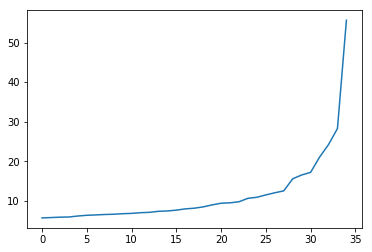

In [6]:
plt.plot(s)
plt.show()

In [7]:
newp = dot(dot(u,diag(s)), vt)
newp

array([[  0.00000000e+00,  -1.12201760e-05,   0.00000000e+00, ...,
          8.52520134e-06,  -4.90767889e-06,   4.45199985e-05],
       [  0.00000000e+00,   8.17623441e-05,   0.00000000e+00, ...,
         -3.73307898e-06,   1.28046522e-05,   2.13677358e-05],
       [  0.00000000e+00,  -1.48161353e-05,   0.00000000e+00, ...,
          1.47566016e-06,   8.43221369e-06,   5.92271044e-06],
       ..., 
       [  0.00000000e+00,  -2.87253692e-06,   0.00000000e+00, ...,
         -2.58270757e-06,   1.04615901e-05,  -3.32569994e-06],
       [  0.00000000e+00,  -3.26026093e-05,   0.00000000e+00, ...,
         -4.73918135e-06,   6.94721239e-05,  -3.53799442e-05],
       [  0.00000000e+00,   3.77089282e-06,   0.00000000e+00, ...,
         -8.64979484e-06,  -3.91562789e-05,  -4.03026388e-06]], dtype=float32)

In [8]:
newp_sparse = csr_matrix(newp)

In [9]:
svdsimilarity = newp_sparse*M.T

In [10]:
target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
playlists_with_tracks=load("playlists_with_tracks.npy")
target_tracks_ordered = load("targetTracksOrdered.npy")
def getsimil(pls, similrow):
    maxi = flip(argsort(similrow), axis=0)
    r = []
    for m in maxi:
        if(not isin(target_tracks_ordered[m], pls[1:])):
           r.append(target_tracks_ordered[m])
           if(len(r)==5):
               return r

In [11]:
fname = "SVDsimilarity"+str(kk)+".csv"

open(fname,"w").close()
print("playlist_id,track_ids",file=open(fname,"a"))
for pl, simil, i in zip(playlists_with_tracks, svdsimilarity, range(10000)):
    if(i%1000==0):
        print("computing "+str(i))
    s = str(int(pl[0]))
    s += ","
    r = getsimil(pl, ravel(simil.todense()))
    for el in r:
        s+=str(el)
        s+=" "
    print(s,file=open(fname,"a"))